In [50]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def format_number(x):
    if abs(x) > 0.0001:
        a = "{:.4f}".format(x)
        return a
    else:
        return '<0.0001'
    
s_c = '結算價'

expiry = 'NearbyMonth'
type_ = 'call'
type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])
forecast_variable = 'slope'
model_type = 'LSTM-LSTM'
model_path = './../../../'
seq_length1 = 7
seq_length2 = seq_length1 + 1
min_contract_day = 2
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
    'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    #if model_dir not in os.listdir(model_path):
        #os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'


file_path = model_path + 'model1.csv'
IV_Data1 = pd.read_csv(file_path, index_col=False, encoding='Big5')



Model_type = ['CNN-LSTM', 'CNN-LSTM']
Seq_Length1 = np.array([7, 29])
Model_type_name = ['{}({})'.format(Model_type[i], Seq_Length1[i]) for i in range(len(Seq_Length1))] 
Seq_Length2 = Seq_Length1 + 1
Min_Contract_day = np.ones(len(Seq_Length1)) * 2

Expiry_UB = [1, 2, 10, 20, 45]
Expiry_LB = [1, 2, 5, 11, 21]

TestResult = np.zeros((len(Model_type), len(Expiry_LB)*2))
for i in range(len(Model_type)):
    model_type = Model_type[i]
    model_path = './../../../'
    seq_length1 = Seq_Length1[i]
    seq_length2 = Seq_Length2[i]
    min_contract_day = Min_Contract_day[i]
    model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
        'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, int(min_contract_day)), forecast_variable]
    for model_dir in model_Dir_tree:
        model_path = model_path + model_dir + '/'

    file_path = model_path + 'model1.csv'
    IV_Data2 = pd.read_csv(file_path, index_col=False, encoding='Big5')

    test_result = np.zeros(len(Expiry_LB)*2)
    for j in range(len(Expiry_UB)):
        IV_Data1_ = IV_Data1[IV_Data1['到期天數'] >= Expiry_LB[j]].reset_index(drop=True)
        IV_Data1_ = IV_Data1_[IV_Data1_['到期天數'] <= Expiry_UB[j]].reset_index(drop=True)
        idx = [k for k in range(0, len(IV_Data1_), 100)]
        loss_data1 = IV_Data1_['loss']
        loss_data1 = loss_data1[idx]


        IV_Data2_ = IV_Data2[IV_Data2['到期天數'] >= Expiry_LB[j]].reset_index(drop=True)
        IV_Data2_ = IV_Data2_[IV_Data2_['到期天數'] <= Expiry_UB[j]].reset_index(drop=True)
        idx = [k for k in range(0, len(IV_Data2_), 100)]
        loss_data2 = IV_Data2_['loss']
        loss_data2 = loss_data2[idx]
        if len(loss_data1) > len(loss_data2):
            loss_data1 = loss_data1[(len(loss_data1)-len(loss_data2)):]
        else:
            loss_data2 = loss_data2[(len(loss_data2)-len(loss_data1)):]
        t_stat, p_value = stats.ttest_rel(loss_data1, loss_data2)
        test_result[j*2:(j+1)*2] = np.array([t_stat, p_value])
    TestResult[i] = test_result



TestResult_columns_names = ['T Stat.', 'P-value']*len(Expiry_LB)
TestResult_Table = pd.DataFrame(columns=TestResult_columns_names, data=TestResult)
TestResult_Table = TestResult_Table.applymap(format_number)
Model_Table = pd.DataFrame({'model': Model_type_name})

D = pd.concat([Model_Table, TestResult_Table], axis=1)
model_path = './../../../'
model_Dir_tree = ['Forecast&model', 'comparison']
for model_dir in model_Dir_tree:
    if model_dir not in os.listdir(model_path):
        os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'
Testfile_name = 'LSTM_vs_CNN_put.csv'
D.to_csv(model_path + Testfile_name, index=False, encoding='Big5')
print(D)

          model  T Stat. P-value  T Stat. P-value  T Stat. P-value  T Stat.  \
0   CNN-LSTM(7)   2.4067  0.0232   1.9454  0.0622  -1.8035  0.0735  -4.2151   
1  CNN-LSTM(29)  -2.4854  0.0194  -1.6750  0.1055   0.7317  0.4656  -2.7412   

   P-value  T Stat.  P-value  
0  <0.0001  -6.3122  <0.0001  
1   0.0068  -2.5523   0.0115  


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_18764\1855530968.py:95: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TestResult_Table = TestResult_Table.applymap(format_number)


In [32]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

def format_number(x):
    if abs(x) > 0.0001:
        a = "{:.4f}".format(x)
        return a
    else:
        return '<.0001'
    
s_c = '結算價'

expiry = 'NearbyMonth'
type_ = 'call'
#type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])
forecast_variable = 'slope'
model_type = 'CNN-LSTM'
model_path = './../../../'
seq_length1 = 7
seq_length2 = seq_length1 + 1
min_contract_day = 2
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
    'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    #if model_dir not in os.listdir(model_path):
        #os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'


file_path = model_path + 'model1.csv'
IV_Data1 = pd.read_csv(file_path, index_col=False, encoding='Big5')


Seq_Length1 = np.array([15])
Model_type = [model_type] * len(Seq_Length1)
Model_type_name = ['{}({})'.format(Model_type[i], Seq_Length1[i]) for i in range(len(Seq_Length1))] 

Seq_Length2 = Seq_Length1 + 1
Min_Contract_day = np.ones(len(Seq_Length1)) * 2

Expiry_UB = [1, 2, 10, 20, 45]
Expiry_LB = [1, 2, 5, 11, 21]

Expiry_UB = [10, 20, 45]
Expiry_LB = [5, 11, 21]

TestResult = np.zeros((len(Model_type), len(Expiry_LB)*2))
for i in range(len(Model_type)):
    model_type = Model_type[i]
    model_path = './../../../'
    seq_length1 = Seq_Length1[i]
    seq_length2 = Seq_Length2[i]
    min_contract_day = Min_Contract_day[i]
    model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
        'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, int(min_contract_day)), forecast_variable]
    for model_dir in model_Dir_tree:
        model_path = model_path + model_dir + '/'

    file_path = model_path + 'model1.csv'
    IV_Data2 = pd.read_csv(file_path, index_col=False, encoding='Big5')

    test_result = np.zeros(len(Expiry_LB)*2)
    for j in range(len(Expiry_UB)):
        IV_Data1_ = IV_Data1[IV_Data1['到期天數'] >= Expiry_LB[j]].reset_index(drop=True)
        IV_Data1_ = IV_Data1_[IV_Data1_['到期天數'] <= Expiry_UB[j]].reset_index(drop=True)
        idx = [k for k in range(0, len(IV_Data1_), 100)]
        loss_data1 = IV_Data1_['loss']
        loss_data1 = loss_data1[idx]


        IV_Data2_ = IV_Data2[IV_Data2['到期天數'] >= Expiry_LB[j]].reset_index(drop=True)
        IV_Data2_ = IV_Data2_[IV_Data2_['到期天數'] <= Expiry_UB[j]].reset_index(drop=True)
        idx = [k for k in range(0, len(IV_Data2_), 100)]
        loss_data2 = IV_Data2_['loss']
        loss_data2 = loss_data2[idx]
        if len(loss_data1) > len(loss_data2):
            loss_data1 = loss_data1[(len(loss_data1)-len(loss_data2)):]
        else:
            loss_data2 = loss_data2[(len(loss_data2)-len(loss_data1)):]
        t_stat, p_value = stats.ttest_rel(loss_data1, loss_data2)
        test_result[j*2:(j+1)*2] = np.array([t_stat, p_value])
    TestResult[i] = test_result



TestResult_columns_names = ['T Stat.', 'P-value']*len(Expiry_LB)
TestResult_Table = pd.DataFrame(columns=TestResult_columns_names, data=TestResult)
TestResult_Table.iloc[:] = TestResult_Table.applymap(format_number)


Model_Table = pd.DataFrame({'model': Model_type_name})

D = pd.concat([Model_Table, TestResult_Table], axis=1)
model_path = './../../../'
model_Dir_tree = ['Forecast&model', 'comparison']
for model_dir in model_Dir_tree:
    model_path = model_path + model_dir + '/'
Testfile_name = '{}_{}_self2.csv'.format(model_type, type_)
D.to_csv(model_path + Testfile_name, index=False, encoding='Big5')
print(D)

          model  T Stat. P-value  T Stat. P-value  T Stat. P-value
0  CNN-LSTM(15)  -1.3996  0.1639  -2.4920  0.0136  -4.9424  <.0001


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_18764\3224179.py:98: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  TestResult_Table.iloc[:] = TestResult_Table.applymap(format_number)
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_18764\3224179.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    -1.3996
Name: T Stat., dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  TestResult_Table.iloc[:] = TestResult_Table.applymap(format_number)
C:\Users\bgpa4\AppData\Local\Temp\ipykernel_18764\3224179.py:98: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0    0.1639
Name: P-value, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  TestResult_Table.iloc[:] = TestResult_Table.applymap(format_number)
C:\Users\bgpa4

Shapiro-Wilk 檢定統計量: 0.9043067147641886
p-value: 0.014452765790893567
------------------------------------------
Kolmogorov-Smirnov 檢定統計量: 0.172585755048284
p-value: 0.3353891084906573


C:\Users\bgpa4\AppData\Local\Temp\ipykernel_21240\1274702211.py:54: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


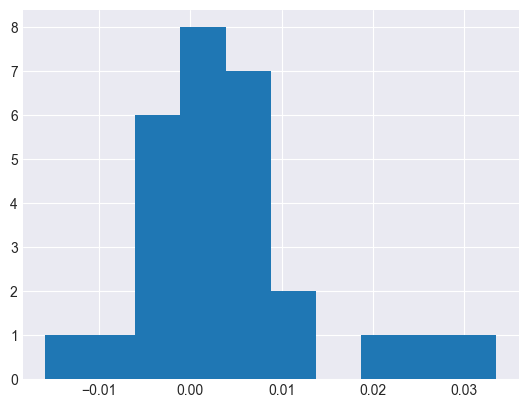

Shapiro-Wilk 檢定統計量: 0.9161658220687094
p-value: 0.027914274943325566
------------------------------------------
Kolmogorov-Smirnov 檢定統計量: 0.15373422018215008
p-value: 0.47588108157568276


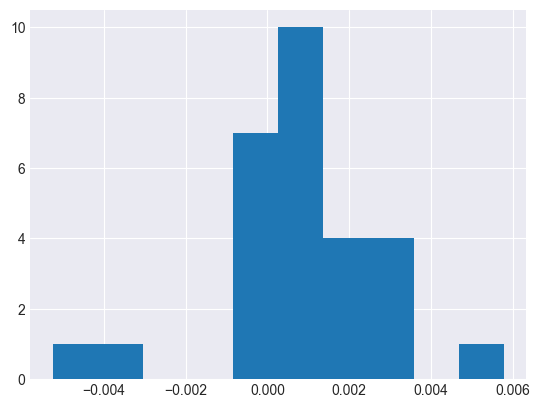

Shapiro-Wilk 檢定統計量: 0.5022840514106525
p-value: 1.5420738040665598e-19
------------------------------------------
Kolmogorov-Smirnov 檢定統計量: 0.22477773018571043
p-value: 1.6132475625675532e-06


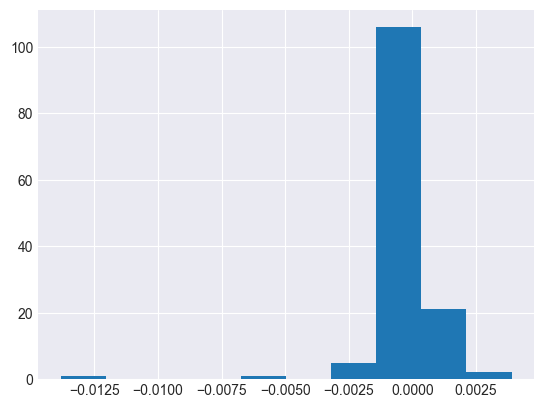

Shapiro-Wilk 檢定統計量: 0.9106834175882489
p-value: 8.492617943366711e-09
------------------------------------------
Kolmogorov-Smirnov 檢定統計量: 0.13443211575165126
p-value: 0.00333471370949421


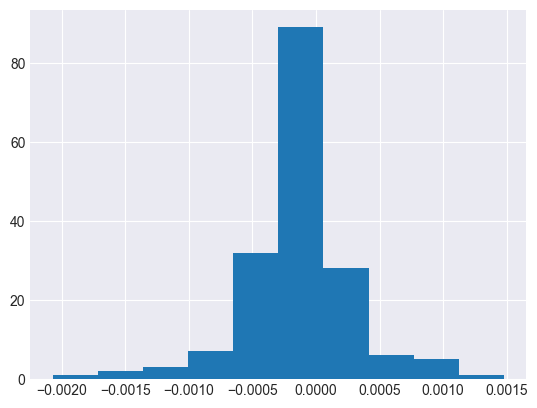

Shapiro-Wilk 檢定統計量: 0.5908154754518407
p-value: 3.560072751419324e-21
------------------------------------------
Kolmogorov-Smirnov 檢定統計量: 0.24244488831479974
p-value: 1.7977807815438203e-10


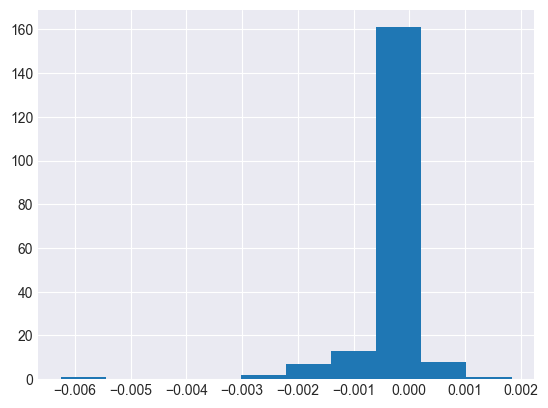

In [9]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as stats

def format_number(x):
    if abs(x) > 0.0001:
        a = "{:.4f}".format(x)
        return a
    else:
        return '<0.0001'
    
s_c = '結算價'

expiry = 'NearbyMonth'
type_ = 'call'
type_ = 'put'
IV_type = '{}IV'.format(type_)
if type_ == 'call':
    K_Range = [300, 500]
if type_ == 'put':
    K_Range = [500, 300]
K_Range_file = '{}_{}.csv'.format(K_Range[0], K_Range[1])
K_Range_dir = '{}_{}'.format(K_Range[0], K_Range[1])
forecast_variable = 'slope'
model_type = 'LSTM-LSTM'
model_path = './../../../'
seq_length1 = 7
seq_length2 = seq_length1 + 1
min_contract_day = 2
model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
    'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, min_contract_day), forecast_variable]
for model_dir in model_Dir_tree:
    #if model_dir not in os.listdir(model_path):
        #os.mkdir(model_path + model_dir)
    model_path = model_path + model_dir + '/'


file_path = model_path + 'model1.csv'
IV_Data1 = pd.read_csv(file_path, index_col=False, encoding='Big5')



Model_type = ['CNN-LSTM']
Seq_Length1 = np.array([7])
Model_type_name = ['{}({})'.format(Model_type[i], Seq_Length1[i]) for i in range(len(Seq_Length1))] 
Seq_Length2 = Seq_Length1 + 1
Min_Contract_day = np.ones(len(Seq_Length1)) * 2

Expiry_UB = [1, 2, 10, 20, 45]
Expiry_LB = [1, 2, 5, 11, 21]
plt.style.use('seaborn-darkgrid')
TestResult = np.zeros((len(Model_type), len(Expiry_LB)*2))
for i in range(len(Model_type)):
    model_type = Model_type[i]
    model_path = './../../../'
    seq_length1 = Seq_Length1[i]
    seq_length2 = Seq_Length2[i]
    min_contract_day = Min_Contract_day[i]
    model_Dir_tree = ['Forecast&model', expiry, IV_type, 'K_{}'.format(K_Range_dir), model_type,\
        'seq{}_seq{}_min{}'.format(seq_length1, seq_length2, int(min_contract_day)), forecast_variable]
    for model_dir in model_Dir_tree:
        model_path = model_path + model_dir + '/'

    file_path = model_path + 'model1.csv'
    IV_Data2 = pd.read_csv(file_path, index_col=False, encoding='Big5')

    test_result = np.zeros(len(Expiry_LB)*2)
    for j in range(len(Expiry_UB)):
        IV_Data1_ = IV_Data1[IV_Data1['到期天數'] >= Expiry_LB[j]].reset_index(drop=True)
        IV_Data1_ = IV_Data1_[IV_Data1_['到期天數'] <= Expiry_UB[j]].reset_index(drop=True)
        idx = [k for k in range(0, len(IV_Data1_), 100)]
        loss_data1 = IV_Data1_['loss']
        loss_data1 = loss_data1[idx]


        IV_Data2_ = IV_Data2[IV_Data2['到期天數'] >= Expiry_LB[j]].reset_index(drop=True)
        IV_Data2_ = IV_Data2_[IV_Data2_['到期天數'] <= Expiry_UB[j]].reset_index(drop=True)
        idx = [k for k in range(0, len(IV_Data2_), 100)]
        loss_data2 = IV_Data2_['loss']
        loss_data2 = loss_data2[idx]
        if len(loss_data1) > len(loss_data2):
            loss_data1 = loss_data1[(len(loss_data1)-len(loss_data2)):]
        else:
            loss_data2 = loss_data2[(len(loss_data2)-len(loss_data1)):]


        loss_d = loss_data1 - loss_data2
        shapiro_test = stats.shapiro(loss_d)

        print(f"Shapiro-Wilk 檢定統計量: {shapiro_test.statistic}")
        print(f"p-value: {shapiro_test.pvalue}")
        plt.hist(loss_d, bins=10)
        print('------------------------------------------')
        ks_test = stats.kstest(loss_d, 'norm', args=(np.mean(loss_d), np.std(loss_d)))

        print(f"Kolmogorov-Smirnov 檢定統計量: {ks_test.statistic}")
        print(f"p-value: {ks_test.pvalue}")
        plt.show()
